In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats, integrate
import seaborn as sns

In [2]:
moviedata = pd.read_csv("movies_data.csv")

In [3]:
moviedata.shape

(2242, 11)

In [4]:
moviedata.columns

Index(['budget', 'genres', 'id', 'production_companies', 'release_date',
       'release_month', 'revenue', 'tagline', 'title', 'vote_average',
       'award_noms'],
      dtype='object')

In [5]:
moviedata.head()

,budget,genres,id,production_companies,release_date,release_month,revenue,tagline,title,vote_average,award_noms
0,3512454,Drama,110428,"[{'name': 'Canal+', 'id': 5358}, {'name': 'Art...",3/13/2013,March,115860,NaN,Camille Claudel 1915,7.0,0
1,40000000,Adventure,77221,"[{'name': 'France 2 CinÃ©ma', 'id': 83}, {'nam...",12/21/2011,December,5446000,NaN,Black Gold,5.9,0
2,21000000,Crime,1646,"[{'name': 'Double Feature Films', 'id': 215}, ...",1/5/2007,January,41170784,Their story. Their world. Their future.,Freedom Writers,7.6,0
3,20000000,Action,14396,"[{'name': 'New Line Cinema', 'id': 12}]",1/5/2007,January,10337477,NaN,Code Name: The Cleaner,4.7,0
4,13000000,Drama,1931,"[{'name': 'Rainforest Films', 'id': 1309}]",5/16/2007,May,75511123,He will challenge their traditions. Their trad...,Stomp the Yard,6.1,0


# Top 10 Movies by Revenue

In [6]:
movdat = moviedata[['title','revenue','budget','genres','release_month','vote_average','award_noms']]
roi = pd.DataFrame((movdat['revenue']/movdat['budget']-1),columns=['roi'])
movdat_df = pd.merge(movdat,roi, how='outer',left_index=True,right_index=True)

byrev = movdat_df.sort_values(['revenue'], ascending=False).head(10)
byrev.style.format({'revenue': "${:,.0f}", 'budget': '${:,.0f}', 'roi': '{:.0%}'})

,title,revenue,budget,genres,release_month,vote_average,award_noms,roi
507,Avatar,"$2,787,965,087","$237,000,000",Action,December,7.2,9,1076%
1603,Star Wars: The Force Awakens,"$2,068,223,624","$245,000,000",Action,December,7.5,0,744%
870,The Avengers,"$1,519,557,910","$220,000,000",Science Fiction,April,7.4,0,591%
1551,Jurassic World,"$1,513,528,810","$150,000,000",Action,June,6.5,0,909%
1664,Furious 7,"$1,506,249,360","$190,000,000",Action,April,7.3,0,693%
1606,Avengers: Age of Ultron,"$1,405,403,694","$280,000,000",Action,April,7.3,0,402%
825,Harry Potter and the Deathly Hallows: Part 2,"$1,342,000,000","$125,000,000",Family,July,7.9,0,974%
1332,Frozen,"$1,274,219,009","$150,000,000",Animation,November,7.3,2,749%
2154,Beauty and the Beast,"$1,262,886,337","$160,000,000",Family,March,6.8,0,689%
2189,The Fate of the Furious,"$1,238,764,765","$250,000,000",Action,April,6.8,0,396%


# Top 10 Movies by Budget Costs

In [7]:
bybud = movdat_df.sort_values(['budget'], ascending=False).head(10)
bybud.style.format({'revenue': "${:,.0f}", 'budget': '${:,.0f}', 'roi': '{:.0%}'})

,title,revenue,budget,genres,release_month,vote_average,award_noms,roi
793,Pirates of the Caribbean: On Stranger Tides,"$1,045,713,802","$380,000,000",Adventure,May,6.4,0,175%
45,Pirates of the Caribbean: At World's End,"$961,000,000","$300,000,000",Adventure,May,6.9,0,220%
1606,Avengers: Age of Ultron,"$1,405,403,694","$280,000,000",Action,April,7.3,0,402%
689,Tangled,"$591,794,936","$260,000,000",Animation,November,7.4,0,128%
2232,Transformers: The Last Knight,"$604,942,143","$260,000,000",Action,June,6.2,0,133%
991,John Carter,"$284,139,100","$260,000,000",Action,March,6.1,0,9%
39,Spider-Man 3,"$890,871,626","$258,000,000",Fantasy,May,5.9,0,245%
1251,The Lone Ranger,"$89,289,910","$255,000,000",Action,July,5.9,0,-65%
687,Harry Potter and the Deathly Hallows: Part 1,"$954,305,868","$250,000,000",Adventure,October,7.5,0,282%
1129,The Hobbit: An Unexpected Journey,"$1,021,103,568","$250,000,000",Adventure,November,7,0,308%


# Top 10 Movies by Award Nominations

In [8]:
byawd = movdat_df.sort_values(['award_noms'], ascending=False).head(10)
byawd.style.format({'revenue': "${:,.0f}", 'budget': '${:,.0f}', 'roi': '{:.0%}'})

,title,revenue,budget,genres,release_month,vote_average,award_noms,roi
2078,La La Land,"$445,435,700","$30,000,000",Comedy,November,7.9,14,1385%
318,The Curious Case of Benjamin Button,"$333,932,083","$150,000,000",Fantasy,November,7.3,13,123%
1121,Lincoln,"$275,293,450","$65,000,000",History,November,6.7,12,324%
1769,The Revenant,"$532,950,503","$135,000,000",Western,December,7.3,12,295%
688,The King's Speech,"$414,211,549","$15,000,000",Drama,September,7.6,12,2661%
907,Hugo,"$185,770,160","$170,000,000",Adventure,November,7,11,9%
1115,Life of Pi,"$609,016,565","$120,000,000",Adventure,November,7.2,11,408%
1287,Gravity,"$716,392,705","$105,000,000",Science Fiction,September,7.3,10,582%
1601,Mad Max: Fury Road,"$378,858,340","$150,000,000",Action,May,7.3,10,153%
879,The Artist,"$133,432,856","$15,000,000",Drama,May,7.3,10,790%


# Top 10 Movies by Return on Investment (ROI)

In [9]:
byroi = movdat_df.sort_values(['roi'], ascending=False).head(10)
byroi.style.format({'revenue': "${:,.0f}", 'budget': '${:,.0f}', 'roi': '{:.0%}'})

,title,revenue,budget,genres,release_month,vote_average,award_noms,roi
734,From Prada to Nada,"$2,500,000",$93,Comedy,January,5,0,2688072%
451,Paranormal Activity,"$193,355,800","$15,000",Horror,September,5.9,0,1288939%
2100,The Tiger: An Old Hunter's Tale,"$11,083,449","$5,000",Action,December,7.5,0,221569%
1764,The Gallows,"$42,664,410","$100,000",Horror,July,4.9,0,42564%
2157,A Ghost Story,"$15,584,255","$100,000",Drama,July,6.8,0,15484%
44,Once,"$20,710,513","$160,000",Drama,March,7.4,1,12844%
952,The Devil Inside,"$101,758,490","$1,000,000",Thriller,January,4.6,0,10076%
657,Catfish,"$3,045,943","$30,000",Documentary,September,6.5,0,10053%
1260,Lost in Thailand,"$208,000,000","$2,200,000",Comedy,December,6.1,0,9355%
1406,The Quiet Ones,"$17,834,867","$200,000",Horror,April,5.1,0,8817%


# Top 10 Movies by Viewer Ratings

In [10]:
byvot = movdat_df.sort_values(['vote_average'], ascending=False).head(10)
byvot.style.format({'revenue': "${:,.0f}", 'budget': '${:,.0f}', 'roi': '{:.0%}'})

,title,revenue,budget,genres,release_month,vote_average,award_noms,roi
1864,Katyar Kaljat Ghusali,"$4,400,000","$1,500,000",Music,November,9,0,193%
1902,The Guide,"$499,168","$722,083",History,November,8.6,0,-31%
1460,Whiplash,"$13,092,000","$3,300,000",Drama,October,8.3,5,297%
183,The Dark Knight,"$1,004,558,444","$185,000,000",Drama,July,8.3,8,443%
1570,Mommy,"$3,494,070","$4,900,000",Drama,May,8.2,0,-29%
965,The Intouchables,"$426,480,871","$13,000,000",Drama,November,8.2,0,3181%
1585,Drishyam,"$12,000,000","$750,000",Crime,December,8.1,0,1500%
1989,The Handmaiden,"$1,983,204","$8,575,000",Thriller,June,8.1,0,-77%
1779,Room,"$35,401,758","$6,000,000",Drama,October,8.1,4,490%
977,Louis C.K.: Live at the Beacon Theater,"$1,000,000","$250,000",Comedy,December,8.1,0,300%


#Count of movies by genre

In [11]:
movdat_df['genres'].value_counts()

Drama              556
Comedy             431
Action             409
Adventure          151
Horror             127
Thriller           113
Crime               97
Animation           78
Romance             56
Fantasy             51
Science Fiction     42
Family              29
Mystery             28
Documentary         23
War                 19
History             17
Music                7
Western              5
Foreign              3
Name: genres, dtype: int64

#Count of movies by month of release

In [12]:
movdat_df['release_month'].value_counts()

September    298
October      214
August       189
December     189
February     178
March        176
May          174
July         167
April        166
November     164
June         164
January      163
Name: release_month, dtype: int64

#Totals for the dataset

In [15]:
tr = g3['revenue'].sum()
tb = g3['budget'].sum()
tan = g3['award_noms'].sum()
print("The total revenue for all movies in dataset is " + '${0:,d}'.format(tr))
print("The total budget costs for all movies in dataset is " + '${0:,d}'.format(tb))
print("The total number of award nominations in the dataset is " + str(tan))

The total revenue for all movies in dataset is $257,404,723,585
The total budget costs for all movies in dataset is $86,553,808,938
The total number of award nominations in the dataset is 521


# Top Genres Chart and Bar Plot

In [14]:
g = movdat_df.groupby('genres').sum()
g = g.drop(columns=['vote_average', 'roi'])
groi = pd.DataFrame((g['revenue']/g['budget']-1),columns=['roi'])
g = pd.merge(g,groi, how='outer',left_index=True,right_index=True)
g = g.reset_index()
g2 = movdat_df.groupby('genres').mean()
g2 = g2.drop(columns=['budget', 'revenue','award_noms','roi'])
g2 = g2.reset_index()
g3 = pd.merge(g,g2)
g3 = g3[['genres','revenue','budget','award_noms','vote_average','roi']]
g3 = g3.sort_values(['revenue'], ascending=False)
g4 = g3.head(6) 
g4.style.format({'revenue': "${:,.0f}", 'budget': '${:,.0f}', 'roi': '{:.0%}', 'vote_average': '{:.1f}'})

,genres,revenue,budget,award_noms,vote_average,roi
0,Action,"$75,043,861,342","$24,686,812,673",45,6.1,204%
1,Adventure,"$38,384,582,208","$13,505,729,594",32,6.3,184%
3,Comedy,"$30,569,734,424","$10,457,845,667",42,6.0,192%
6,Drama,"$28,356,420,918","$10,693,547,761",247,6.5,165%
2,Animation,"$24,190,848,980","$6,672,784,588",21,6.5,263%
15,Science Fiction,"$11,274,598,085","$3,161,420,003",14,6.4,257%


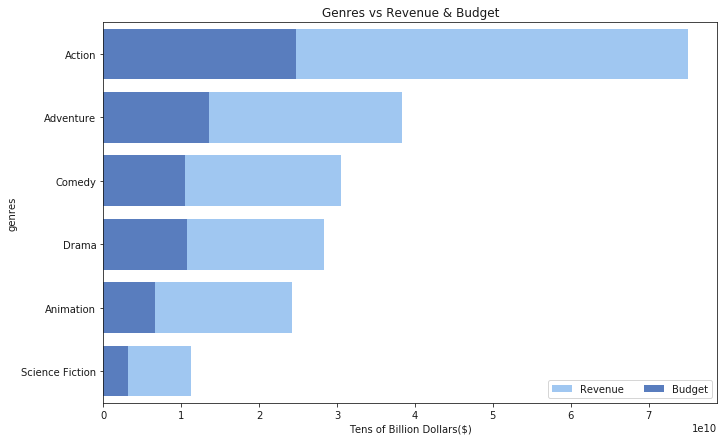

In [17]:
plt.subplots(figsize=(11, 7))
sns.set_color_codes("pastel")
sns.barplot(x="revenue", y="genres", data=g4,label="Revenue", color="b")
sns.set_color_codes("muted")
sns.barplot(x="budget", y="genres", data=g4,label="Budget", color="b")
plt.legend(ncol=2, loc="lower right", frameon=True)
plt.xlabel("Tens of Billion Dollars($)")
plt.title("Genres vs Revenue & Budget")
plt.savefig("Top Genres Bar Plot")
plt.show()

# Chart by Month of Release and Bar Plot

In [18]:
mo = movdat_df.groupby('release_month').sum()
mo = mo.drop(columns=['vote_average', 'roi'])
moroi = pd.DataFrame((mo['revenue']/mo['budget']-1),columns=['roi'])
mo = pd.merge(mo,moroi, how='outer',left_index=True,right_index=True)
mo = mo.reset_index()
mo2 = movdat_df.groupby('release_month').mean()
mo2 = mo2.drop(columns=['budget', 'revenue','award_noms','roi'])
mo2 = mo2.reset_index()
mo3 = pd.merge(mo,mo2)
mo3 = mo3[['release_month','revenue','budget','award_noms','vote_average','roi']]
mo3 = mo3.sort_values(['roi'], ascending=False)
mo3.style.format({'revenue': "${:,.0f}", 'budget': '${:,.0f}', 'roi': '{:.0%}', 'vote_average': '{:.1f}'})

,release_month,revenue,budget,award_noms,vote_average,roi
6,June,"$37,458,553,218","$10,053,027,964",20,6.3,273%
2,December,"$29,682,127,801","$9,099,080,528",101,6.3,226%
0,April,"$21,329,321,356","$6,582,837,936",2,6.1,224%
9,November,"$22,418,144,562","$7,181,503,469",133,6.5,212%
5,July,"$24,704,426,548","$8,080,515,448",32,6.2,206%
8,May,"$27,325,073,348","$9,387,618,741",46,6.4,191%
3,February,"$15,577,154,469","$5,556,232,967",19,6.2,180%
7,March,"$21,226,776,059","$7,761,220,129",8,6.2,173%
10,October,"$17,881,531,302","$6,603,895,033",65,6.3,171%
1,August,"$14,567,168,524","$5,817,958,457",34,6.1,150%


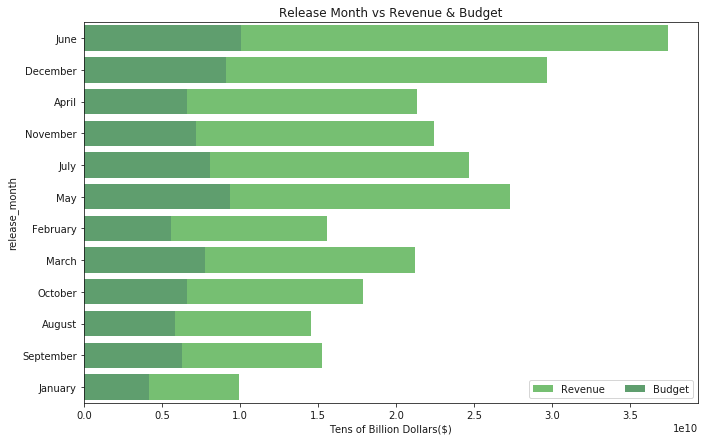

In [20]:
plt.subplots(figsize=(11, 7))
sns.set_color_codes("muted")
sns.barplot(x="revenue", y="release_month", data=mo3,label="Revenue", color="g")
sns.set_color_codes("deep")
sns.barplot(x="budget", y="release_month", data=mo3,label="Budget", color="g")
plt.legend(ncol=2, loc="lower right", frameon=True)
plt.xlabel("Tens of Billion Dollars($)")
plt.title("Release Month vs Revenue & Budget")
plt.savefig("Release Month Bar Plot")
plt.show()

# Correlation matrix

In [16]:
movdat_df.corr()

,revenue,budget,vote_average,award_noms,roi
revenue,1.000000,0.783859,0.193535,0.197553,-0.006056
budget,0.783859,1.000000,0.074723,0.094426,-0.024073
vote_average,0.193535,0.074723,1.000000,0.245995,-0.027562
award_noms,0.197553,0.094426,0.245995,1.000000,-0.004273
roi,-0.006056,-0.024073,-0.027562,-0.004273,1.000000


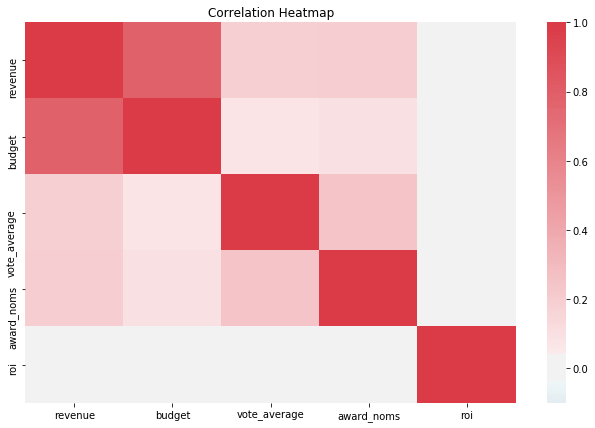

In [17]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
plt.subplots(figsize=(11, 7))
sns.heatmap(movdat_df.corr(),cmap=cmap,vmin=-0.1, center=0)
plt.title("Correlation Heatmap")
plt.savefig("Correlation Heatmap")
plt.show()

In [18]:
movdat_df.corr()

,revenue,budget,vote_average,award_noms,roi
revenue,1.000000,0.783859,0.193535,0.197553,-0.006056
budget,0.783859,1.000000,0.074723,0.094426,-0.024073
vote_average,0.193535,0.074723,1.000000,0.245995,-0.027562
award_noms,0.197553,0.094426,0.245995,1.000000,-0.004273
roi,-0.006056,-0.024073,-0.027562,-0.004273,1.000000


In [19]:
actmov = movdat_df.query("genres=='Action'")
actmov.corr()

,revenue,budget,vote_average,award_noms,roi
revenue,1.000000,0.775657,0.333995,0.352148,-0.016927
budget,0.775657,1.000000,0.220649,0.195279,-0.043746
vote_average,0.333995,0.220649,1.000000,0.184407,0.092701
award_noms,0.352148,0.195279,0.184407,1.000000,-0.002326
roi,-0.016927,-0.043746,0.092701,-0.002326,1.000000


In [20]:
dramov = movdat_df.query("genres=='Drama'")
dramov.corr()

,revenue,budget,vote_average,award_noms,roi
revenue,1.000000,0.704408,0.261886,0.360416,0.141592
budget,0.704408,1.000000,0.078533,0.117167,-0.085324
vote_average,0.261886,0.078533,1.000000,0.296729,0.175056
award_noms,0.360416,0.117167,0.296729,1.000000,0.123833
roi,0.141592,-0.085324,0.175056,0.123833,1.000000


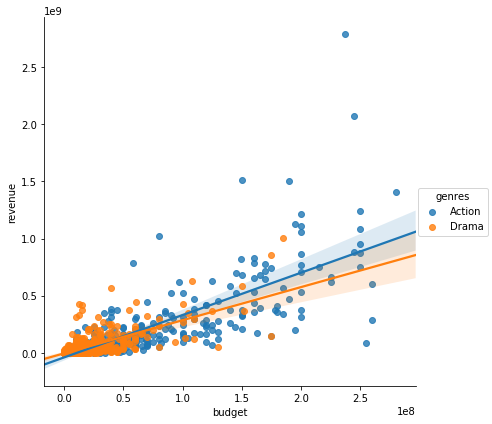

In [21]:
actdram = [actmov, dramov]
twogenre= pd.concat(actdram)
sns.lmplot(x="budget", y="revenue", hue="genres",size=6, data=twogenre);

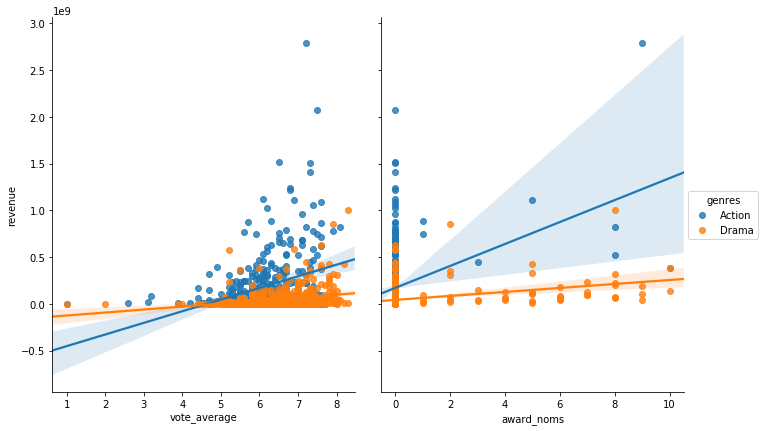

In [22]:
sns.pairplot(twogenre, x_vars=["vote_average", "award_noms"], hue="genres", y_vars=["revenue"],
             size=6, aspect=.8, kind="reg");

In [23]:
junemov = movdat_df.query("release_month=='June'")
junemov.corr()

,revenue,budget,vote_average,award_noms,roi
revenue,1.000000,0.737119,0.156925,0.168653,0.381141
budget,0.737119,1.000000,-0.029203,0.136053,-0.016479
vote_average,0.156925,-0.029203,1.000000,0.239110,0.214405
award_noms,0.168653,0.136053,0.239110,1.000000,0.102716
roi,0.381141,-0.016479,0.214405,0.102716,1.000000


In [24]:
decmov = movdat_df.query("release_month=='December'")
decmov.corr()

,revenue,budget,vote_average,award_noms,roi
revenue,1.000000,0.737371,0.224114,0.317259,-0.027718
budget,0.737371,1.000000,0.055310,0.128229,-0.073586
vote_average,0.224114,0.055310,1.000000,0.321827,0.102825
award_noms,0.317259,0.128229,0.321827,1.000000,-0.016715
roi,-0.027718,-0.073586,0.102825,-0.016715,1.000000


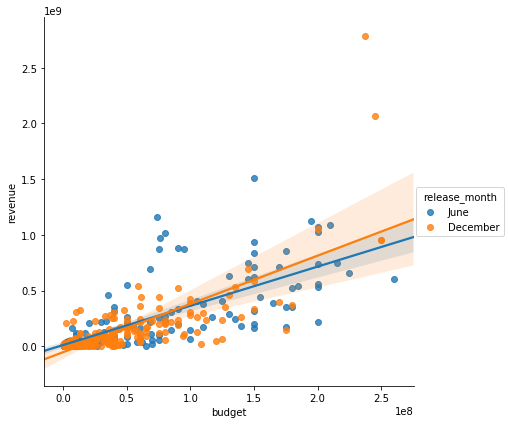

In [25]:
jundec = [junemov, decmov]
twomonth= pd.concat(jundec)
sns.lmplot(x="budget", y="revenue", hue="release_month", size=6, data=twomonth);

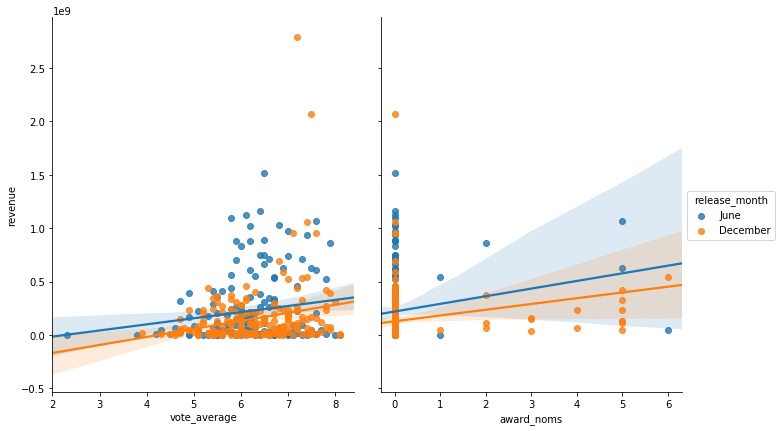

In [26]:
sns.pairplot(twomonth, x_vars=["vote_average", "award_noms"], hue="release_month", y_vars=["revenue"],
             size=6, aspect=.8, kind="reg");

#Scatter plots

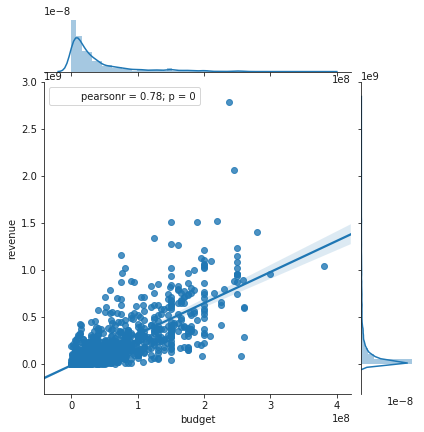

In [25]:
sns.jointplot('budget','revenue',data=movdat_df,kind="reg")


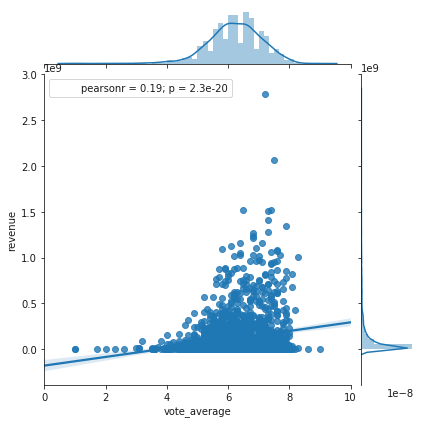

In [28]:
sns.jointplot('vote_average','revenue',data=movdat_df,kind="reg")

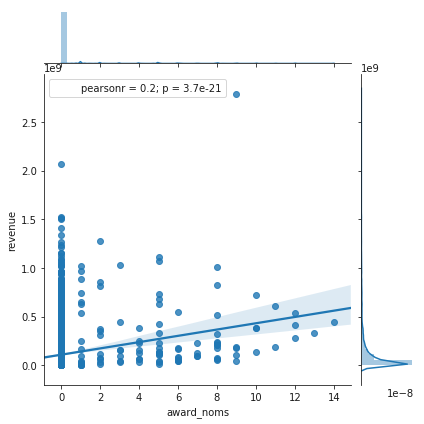

In [29]:
sns.jointplot('award_noms','revenue',data=movdat_df,kind="reg")

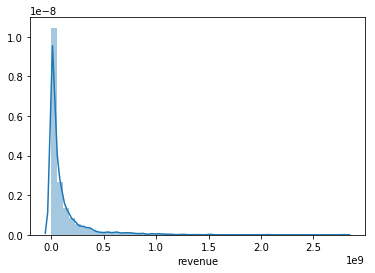

In [58]:
sns.distplot(movdat_df['revenue'])

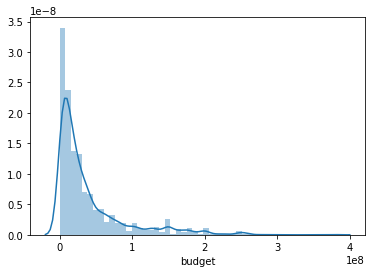

In [61]:
sns.distplot(movdat_df['budget'])